# 1. Работа с таблицей

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 1.1 Чтение таблицы

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [4]:
column_names = ['seq', 'amk', 'TRBV', 'TRBJ']
df = pd.read_csv('~/class/class_2/TRB_10_7.tsv', sep='\t', header=None, names=column_names)
df.head()

,seq,amk,TRBV,TRBJ
0,TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC,CASSGRGTLLGTF,TRBV7-9,TRBJ1-2
1,TGTGGACGGAAGGACGAGCAGTACTTC,CGRKDEQYF,TRBV20-1,TRBJ2-7
2,TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT,CSARGVFSEAFF,TRBV20-1,TRBJ1-1
3,TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC,CATNDRGRTYNEQFF,TRBV24-1,TRBJ2-1
4,TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...,CASSLAGLAGCRKLTEETQYF,TRBV27,TRBJ2-5


## 1.2 Построение графика

In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import seaborn as sns

/scratch/ipykernel_1824666/2919240415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trbv_counts.index, y=trbv_counts.values, palette="viridis")


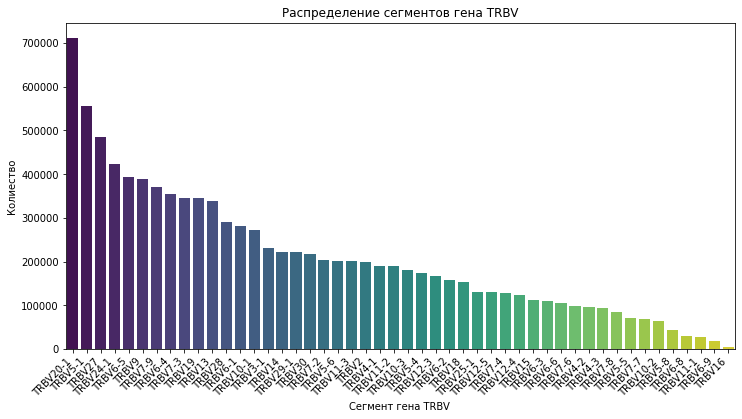

In [7]:
#мой график показывает как часто встречается каждый сегмент гена TRBV 

trbv_counts = df['TRBV'].value_counts() 

plt.figure(figsize=(12, 6))  
sns.barplot(x=trbv_counts.index, y=trbv_counts.values, palette="viridis")  
plt.title('Распределение сегментов гена TRBV')
plt.xlabel('Сегмент гена TRBV ')
plt.ylabel('Колиество')
plt.xticks(rotation=45, ha="right")  
plt.show()

# 2. Картинка

In [8]:
from IPython.display import Image, display
image = 'https://s0.rbk.ru/v6_top_pics/media/img/1/04/756529824000041.jpg'
display(Image(url=image))

# 3*

In [9]:
pip install rpy2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2 import robjects
from rpy2.robjects import r

In [11]:
pandas2ri.activate()

In [12]:
from rpy2.robjects.conversion import localconverter

In [13]:
with localconverter(robjects.default_converter + pandas2ri.converter):
  r_from_pd_df = robjects.conversion.py2rpy(df.head(100))


In [14]:
robjects.globalenv['r_df'] = r_from_pd_df

In [15]:
robjects.r('library(ggplot2)')

In [16]:
import rpy2.robjects.packages as rpackages


In [17]:
ggplot2 = rpackages.importr('ggplot2')
base = rpackages.importr('base')

plot = ggplot2.ggplot(r_from_pd_df) + \
       ggplot2.aes_string(x='TRBV') + \
       ggplot2.geom_bar() + \
       ggplot2.ggtitle("Distribution of TRBV Gene Segments (ggplot2)") + \
       ggplot2.theme(axis_text_x = ggplot2.element_text(angle = 45, hjust = 1)) + \
       ggplot2.labs(title = "Distribution of TRBV Gene Segments (ggplot2)",
       x = "TRBV Gene Segment",
       y = "Count")

In [18]:
from rpy2.robjects.lib import grdevices
print("grdevices imported successfully!")

grdevices imported successfully!


In [19]:
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import rpy2.robjects.packages as rpackages
from rpy2.robjects.lib import grdevices
from IPython import display

# Load your data (assuming you still have this)
column_names = ['seq', 'amk', 'TRBV', 'TRBJ']
df = pd.read_csv('~/class/class_2/TRB_10_7.tsv', sep='\t', header=None, names=column_names)

# Activate pandas conversion in rpy2
pandas2ri.activate()

# Convert the pandas DataFrame to an R data frame
with localconverter(robjects.default_converter + pandas2ri.converter):
  r_from_pd_df = robjects.conversion.py2rpy(df.head(100))

# Construct and show the ggplot2 plot in Python
ggplot2 = rpackages.importr('ggplot2')
base = rpackages.importr('base')

plot = ggplot2.ggplot(r_from_pd_df) + \
       ggplot2.aes_string(x='TRBV') + \
       ggplot2.geom_bar() + \
       ggplot2.ggtitle("Distribution of TRBV Gene Segments (ggplot2)") + \
       ggplot2.theme(axis_text_x = ggplot2.element_text(angle = 45, hjust = 1)) + \
       ggplot2.labs(title = "Distribution of TRBV Gene Segments (ggplot2)",
       x = "TRBV Gene Segment",
       y = "Count")

# Display the plot using grdevices
with grdevices.render_to_bytesio(grdevices.png, width=8, height=6, units="in", res=150) as buf:
    plot.plot()
    r_result = buf.getvalue()

display.Image(data=r_result, format='png')

AttributeError: 'ListVector' object has no attribute 'plot'